# Tarea 1 - Fisica Computacional
#### Estudiante: Ignacio Vargas Cordero

### Ejercicio 1  
Realice un notebook en el se programen y expliquen los siguientes algoritmos de integracion de ecuaciones diferenciales:

1. Integracion con metodo de Euler
2. Integracion sobre serie de Taylor a 2 orden
3. Integracion con metodo de Runge-Kutta de 2 orden
4. Integracion con metodo de Runge-Kutta de 4 orden

Verifique el funcionamiento de sus integradores encontrando la solucion de la siguiente ecuacion diferencial para $y(t)$:

$\ddot{x} + 0.5\dot{x} + \sin{x} = e^{-t} \sin(3t)$

con condiciones iniciales $\dot{x}(0) = 1$ y $x(0) = 0$

In [1]:
from pylab import *
%matplotlib inline

#### Integracion con metodo de Euler

In [2]:
def euler(ecuacion, punto_inicial, x, h=0.01):
    tiempos = arange(x[0], x[1]+h, h)
    solucion = zeros((len(tiempos), len(punto_inicial)))
    solucion[0,:] = punto_inicial
    for i in xrange(len(solucion)-1):
        solucion[i+1] = solucion[i]+h*ecuacion(solucion[i], tiempos[i])
    return tiempos, solucion

#### Integracion sobre serie de Taylor a 2 orden

In [3]:
def taylor2(ecuacion, d_ecuacion, punto_inicial, x, h=0.1):
    tiempos = arange(x[0], x[1]+h, h)
    solucion = zeros((len(tiempos), len(punto_inicial)))
    solucion[0,:] = punto_inicial
    for i in xrange(len(tiempos)-1):
        f = ecuacion(solucion[i,:], tiempos[i])
        df, jacobiano = d_ecuacion(solucion[i,:], tiempos[i])
        solucion[i+1,:] = solucion[i,:]+h*f+(0.5*h*h*(df+dot(jacobiano, f)))
    return tiempos, solucion

#### Integracion con metodo de Runge-Kutta de 2 orden

In [4]:
def rk2(ecuacion, punto_inicial, x, h=0.1):
    tiempos = arange(x[0], x[1]+h, h)
    solucion = zeros((len(tiempos), len(punto_inicial)))
    solucion[0,:] = punto_inicial
    for i in xrange(len(tiempos)-1):
        k = h*ecuacion(solucion[i,:], tiempos[i])
        f = ecuacion(solucion[i,:]+0.5*k, tiempos[i]+0.5*h)
        solucion[i+1,:] = solucion[i,:]+h*f
    return tiempos, solucion

#### Integracion con metodo de Runge-Kutta de 4 orden

In [5]:
def rk4(ecuacion, punto_inicial, x, h=0.1):
    tiempos = arange(x[0], x[1]+h, h)
    solucion = zeros((len(tiempos), len(punto_inicial)))
    solucion[0,:] = punto_inicial
    for i in xrange(len(tiempos)-1):
        k1 = ecuacion(solucion[i,:], tiempos[i])
        k2 = ecuacion(solucion[i,:]+0.5*h*k1, tiempos[i]+0.5*h)
        k3 = ecuacion(solucion[i,:]+0.5*h*k2, tiempos[i]+0.5*h)
        k4 = ecuacion(solucion[i,:]+h*k3, tiempos[i]+h)
        solucion[i+1,:] = solucion[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos, solucion

#### Plot de Integraciones

In [23]:
def integrador_surtido(ecuacion, d_ecuacion, punto_inicial, x, h, timeplot=1, phaseplot=1):

    tiempos_euler, solucion_euler = euler(ecuacion, punto_inicial, x, h)
    tiempos_taylor2, solucion_taylor2 = taylor2(ecuacion, d_ecuacion, punto_inicial, x, h)
    tiempos_rk2, solucion_rk2 = rk2(ecuacion, punto_inicial, x, h)
    tiempos_rk4, solucion_rk4 = rk4(ecuacion, punto_inicial, x, h)
    
    if timeplot == 1:
        fig1 = figure()
        ax = fig1.add_subplot(111)
        ax.plot(tiempos_euler, solucion_euler[:,0], label="Euler")
        ax.plot(tiempos_taylor2, solucion_taylor2[:,0], label="Taylor2")
        ax.plot(tiempos_rk2, solucion_rk2[:,0], label="RK2")
        ax.plot(tiempos_rk4, solucion_rk4[:,0], label="RK4")
        ax.set_xlabel("$t$")
        ax.set_ylabel("$x(t)$")
        ax.set_title(u"Métodos en el tiempo, h="+str(h))
        ax.legend(loc='best')
        ax.grid(True)
        
    if phaseplot == 1:
        fig2 = figure()
        bx = fig2.add_subplot(111)
        bx.plot(solucion_euler[:,0], solucion_euler[:,1], label="Euler")
        bx.plot(solucion_taylor2[:,0], solucion_taylor2[:,1], label="Taylor2")
        bx.plot(solucion_rk2[:,0], solucion_rk2[:,1], label="RK2")
        bx.plot(solucion_rk4[:,0], solucion_rk4[:,1], label="RK4")
        bx.set_xlabel("$x(t)$")
        bx.set_ylabel("$\dot x(t)$")
        bx.set_title(u"Métodos en el espacio fase, h="+str(h))
        bx.legend(loc='best')
        bx.grid(True)

#### Ecuacion Diferencial: $\ddot{x} + 0.5\dot{x} + \sin{x} = e^{-t} \sin(3t)$, $x(0) = 0$, $\dot{x}(0) = 1$

In [7]:
#y = (y1, y2)
def ecuacion1(y, t):
    y1_prima = y[1]
    y2_prima = -0.5*y[1] - sin(y[0]) + exp(-t)*sin(3*t)
    return array ([y1_prima, y2_prima])

def d_ecuacion1(y, t):
    return array ([0, (3*cos(3*t)-sin(3*t))*exp(-t)]), array([[0,1],[-cos(y[0]),-0.5]])

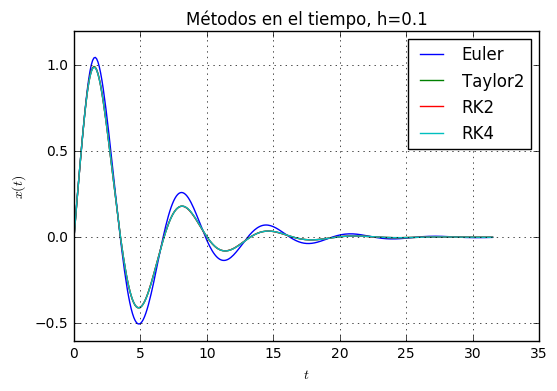

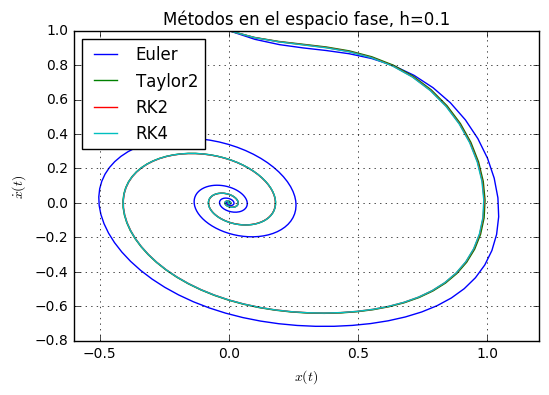

In [24]:
integrador_surtido(ecuacion1, d_ecuacion1, array([0.0, 1.0]), [0, 10*pi], 0.1)

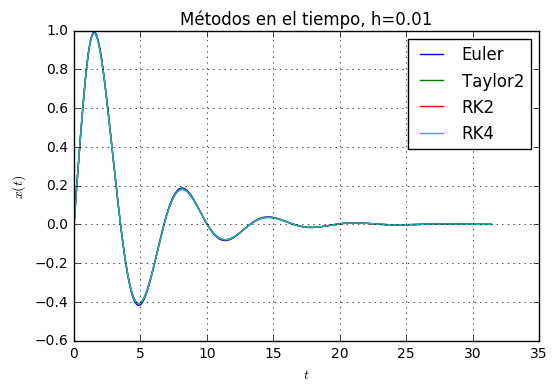

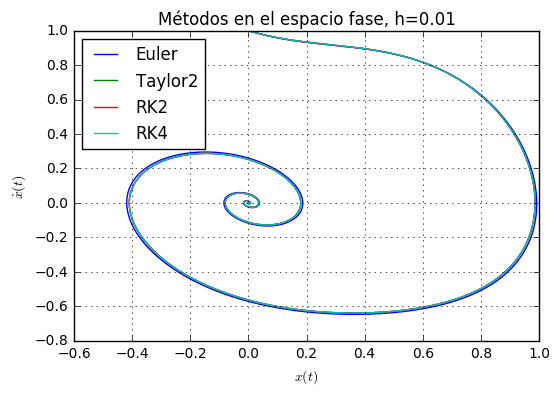

In [25]:
integrador_surtido(ecuacion1, d_ecuacion1, array([0.0, 1.0]), [0, 10*pi], 0.01)

### Ejercicio 2  
Utilizando los integradores anteriores encuentre el mejor paso de integracion para la siguiente ecuacion:

$\dddot{y} + \ddot{y}^2 - 3\dot{y}^3 + \cos^2{y} = e^{-t} \sin(3t)$

con condiciones iniciales $\ddot{y}(1) = 1, \dot{y}(1) = 2, y(1) = 1$. En particular que sucede en el intervalo $t \in [1,2]$ y $t \in [1,2.1]$.

In [10]:
#y = (y1, y2, y3)
def ecuacion2(y, t):
    y1_prima = y[1]
    y2_prima = y[2]
    y3_prima = exp(-t)*sin(3*t) - y[2]*y[2] + 3*y[1]*y[1]*y[1]+cos(y[0])*cos(y[0])
    return array ([y1_prima, y2_prima, y3_prima])

def d_ecuacion2(y, t):
    return array([0,0,(3*cos(3*t)-sin(3*t))*exp(-t)]), array([[0,1,0], [0,0,1], [sin(2*y[0]),9*y[1]*y[1],-2*y[2]]])

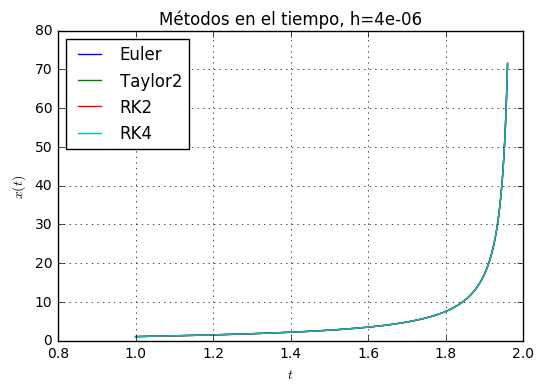

In [20]:
integrador_surtido(ecuacion2, d_ecuacion2, array([1.0,2.0,1.0]), [1.,1.96], 4e-6, 1, 0)

### Ejercicio 3  
Modifique las funciones integradoras en el problema 1 de tal manera que se puedan pasar argumentos opcionales al sistema de ecuaciones diferenciales de tal manera que se puedan modificar parametros al momento de hacer la integracion. Una vez hecho esto, obtenga la solucion de la siguiente ecucacion diferencial

$\ddot{x} + \frac{1}{10}\dot{x} + 4\sin{x} = \frac{1}{2}\sin(\omega t)$

Con condiciones iniciales $\dot{x}(0) = 1$ y $x(0) = 0$ y para $\omega = \{1,1.1,1.2,1.3,...,2.9,3\}$. Realice la grafica de algunas soluciones que representen el comportamiento de la solucion en funcion de $\omega$ y explique su resultado.


In [26]:
def euler_args(ecuacion, punto_inicial, x, argumentos, h=0.01):
    tiempos = arange(x[0], x[1]+h, h)
    solucion = zeros((len(tiempos), len(punto_inicial)))
    solucion[0,:] = punto_inicial
    for i in xrange(len(solucion)-1):
        solucion[i+1] = solucion[i]+h*ecuacion(solucion[i], tiempos[i], argumentos)
    return tiempos, solucion

def taylor2_args(ecuacion, d_ecuacion, punto_inicial, x, argumentos, h=0.1):
    tiempos = arange(x[0], x[1]+h, h)
    solucion = zeros((len(tiempos), len(punto_inicial)))
    solucion[0,:] = punto_inicial
    for i in xrange(len(tiempos)-1):
        f = ecuacion(solucion[i,:], tiempos[i], argumentos)
        df, jacobiano = d_ecuacion(solucion[i,:], tiempos[i], argumentos)
        solucion[i+1,:] = solucion[i,:]+h*f+(0.5*h*h*(df+dot(jacobiano, f)))
    return tiempos, solucion

def rk2_args(ecuacion, punto_inicial, x, argumentos, h=0.1):
    tiempos = arange(x[0], x[1]+h, h)
    solucion = zeros((len(tiempos), len(punto_inicial)))
    solucion[0,:] = punto_inicial
    for i in xrange(len(tiempos)-1):
        k = h*ecuacion(solucion[i,:], tiempos[i], argumentos)
        f = ecuacion(solucion[i,:]+0.5*k, tiempos[i]+0.5*h, argumentos)
        solucion[i+1,:] = solucion[i,:]+h*f
    return tiempos, solucion

def rk4_args(ecuacion, punto_inicial, x, argumentos, h=0.1):
    tiempos = arange(x[0], x[1]+h, h)
    solucion = zeros((len(tiempos), len(punto_inicial)))
    solucion[0,:] = punto_inicial
    for i in xrange(len(tiempos)-1):
        k1 = ecuacion(solucion[i,:], tiempos[i], argumentos)
        k2 = ecuacion(solucion[i,:]+0.5*h*k1, tiempos[i]+0.5*h, argumentos)
        k3 = ecuacion(solucion[i,:]+0.5*h*k2, tiempos[i]+0.5*h, argumentos)
        k4 = ecuacion(solucion[i,:]+h*k3, tiempos[i]+h, argumentos)
        solucion[i+1,:] = solucion[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos, solucion

In [ ]:
def integrador_individual()

def integrador_surtido(ecuacion, d_ecuacion, punto_inicial, x, h, timeplot=1, phaseplot=1):

    tiempos_euler, solucion_euler = euler(ecuacion, punto_inicial, x, h)
    tiempos_taylor2, solucion_taylor2 = taylor2(ecuacion, d_ecuacion, punto_inicial, x, h)
    tiempos_rk2, solucion_rk2 = rk2(ecuacion, punto_inicial, x, h)
    tiempos_rk4, solucion_rk4 = rk4(ecuacion, punto_inicial, x, h)
    
    if timeplot == 1:
        fig1 = figure()
        ax = fig1.add_subplot(111)
        ax.plot(tiempos_euler, solucion_euler[:,0], label="Euler")
        ax.plot(tiempos_taylor2, solucion_taylor2[:,0], label="Taylor2")
        ax.plot(tiempos_rk2, solucion_rk2[:,0], label="RK2")
        ax.plot(tiempos_rk4, solucion_rk4[:,0], label="RK4")
        ax.set_xlabel("$t$")
        ax.set_ylabel("$x(t)$")
        ax.set_title(u"Métodos en el tiempo, h="+str(h))
        ax.legend(loc='best')
        ax.grid(True)
        
    if phaseplot == 1:
        fig2 = figure()
        bx = fig2.add_subplot(111)
        bx.plot(solucion_euler[:,0], solucion_euler[:,1], label="Euler")
        bx.plot(solucion_taylor2[:,0], solucion_taylor2[:,1], label="Taylor2")
        bx.plot(solucion_rk2[:,0], solucion_rk2[:,1], label="RK2")
        bx.plot(solucion_rk4[:,0], solucion_rk4[:,1], label="RK4")
        bx.set_xlabel("$x(t)$")
        bx.set_ylabel("$\dot x(t)$")
        bx.set_title(u"Métodos en el espacio fase, h="+str(h))
        bx.legend(loc='best')
        bx.grid(True)

In [27]:
# Se define la ecuacion diferencial
def ecuacion3(y, t, args):
    y1_prima = y[1]
    y2_prima = -0.1*y[1] - 4.0*sin(y[0]) + 0.5*sin(args[0]*t)
    return array([y1_prima, y2_prima])

# Se define el jacobiano del sistema
def d_ecuacion3(y, t, args):
    return array([0, 0.5*args[0]*cos(args[0]*t)]), array([[0,1],[-4*cos(y[0]),-0.1]])

### Ejercicio 4  
Considere el siguiente sistema de ecuaciones diferenciales

$$\frac{dx}{dt} = 10(y-x)\\
\frac{dy}{dt} = x(28-z)-y\\
\frac{dx}{dt} = xy - \frac{8}{3}z$$

Realice una integracion numerica del sistema de ecuaciones con alguno de los integradores del problema (el que mas le guste) y realice los siguientes ejercicios:

1. Elja una condicion inicial aleatoria en el $x,y,z \in [-5,5]$ y realice la grafica de la solucion en el plano $xy, xz, yz$ y comente sobre sus observaciones.

2. Ahora tome 3 soluciones parecidas. Para ello proponga 3 condiciones iniciales tales que en la coordenada en $y$ las condiciones iniciales difieran entr esi en $10^{-2}$. Explique lo que observa.  
Nota: De preferencia realice las integraciones con tiempos relativamente largos en los que pueda apreciar diferencias en el comportamiento de las soluciones.